**MENGIMPORT DATA KE GOOGLE COLAB**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Get the path to the file on the mounted Drive
breast_cancer= '/content/drive/MyDrive/DA/breastCancer/breast-cancer-wisconsin.data'

**IMPORT LIBRARIES**

manipulasi data menggunakan pandas dan numpy

visualisasi dengan matplotlib dan seaborn

machine learning dengan scikit learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

**LOAD DATA**
- membaca dataset dari file csv dan memberikan nama pada setiap kolom

- mengatur pandas menampilkan semua kolom dan menyesuaikan lebar tampilan biar table lebih mudah dibaca

- menampilkan 5 baris pertama dari dataset

In [ ]:
data = pd.read_csv(breast_cancer, names=['Sample_code_number', 'Clump_thickness', 'Uniformity of_cell_size', 'Uniformity_of_cell_shape', 'Marginal_adhesion', 'Single_epithelial_cell_size', 'Bare_nuclei', 'Bland_chromatin', 'Normal_nucleoli', 'Mitoses', 'Class'])
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print(data.head(10))

   Sample_code_number  Clump_thickness  Uniformity of_cell_size  Uniformity_of_cell_shape  Marginal_adhesion  Single_epithelial_cell_size Bare_nuclei  Bland_chromatin  Normal_nucleoli  Mitoses  Class
0             1000025                5                        1                         1                  1                            2           1                3                1        1      2
1             1002945                5                        4                         4                  5                            7          10                3                2        1      2
2             1015425                3                        1                         1                  1                            2           2                3                1        1      2
3             1016277                6                        8                         8                  1                            3           4                3                7        1      2


In [ ]:
# memeriksa tipe data
print(data.dtypes)

Sample_code_number              int64
Clump_thickness                 int64
Uniformity of_cell_size         int64
Uniformity_of_cell_shape        int64
Marginal_adhesion               int64
Single_epithelial_cell_size     int64
Bare_nuclei                    object
Bland_chromatin                 int64
Normal_nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object


In [ ]:
# menghitung nilai unik dalam kolom 'Bare_nuclei'
print(data['Bare_nuclei'].unique())

['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']


menggantikan missing values dari karakter '?' dengan NaN agar bisa dikenali sebagai missing value oleh pandas

In [ ]:
# Replace '?' with NaN
data.replace('?', np.nan, inplace=True)

konversi tipe data kolom 'Bare_nuclei" jadi tipe data numerik karena sebelumnya dia string

In [ ]:
# Convert 'Bare_nuclei' to numeric
data['Bare_nuclei'] = pd.to_numeric(data['Bare_nuclei'])

**DATA PREPROCESSING**

memeriksa missing values yang hilang tiap kolom

In [ ]:
# Check for missing values
print(data.isnull().sum())

Sample_code_number              0
Clump_thickness                 0
Uniformity of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64


In [ ]:
# Menampilkan baris dengan nilai yang hilang dalam kolom
print(data[data['Bare_nuclei'].isnull()])

     Sample_code_number  Clump_thickness  Uniformity of_cell_size  Uniformity_of_cell_shape  Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  Bland_chromatin  Normal_nucleoli  Mitoses  Class
23              1057013                8                        4                         5                  1                            2          NaN                7                3        1      4
40              1096800                6                        6                         6                  9                            6          NaN                7                8        1      2
139             1183246                1                        1                         1                  1                            1          NaN                2                1        1      2
145             1184840                1                        1                         3                  1                            2          NaN                2                1  

Mengimput nilai yang hilang dengan nilai median dari setiap kolom menggunakan 'SimpleImputer' dan membuat DataFrame baru data_imputed dengan nilai yang sudah diimput.

In [ ]:
# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)


In [ ]:
# Descriptive statistics and visualizations
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print(data_imputed.describe())

       Sample_code_number  Clump_thickness  Uniformity of_cell_size  Uniformity_of_cell_shape  Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  Bland_chromatin  Normal_nucleoli     Mitoses       Class
count        6.990000e+02       699.000000               699.000000                699.000000         699.000000                   699.000000   699.000000       699.000000       699.000000  699.000000  699.000000
mean         1.071704e+06         4.417740                 3.134478                  3.207439           2.806867                     3.216023     3.486409         3.437768         2.866953    1.589413    2.689557
std          6.170957e+05         2.815741                 3.051459                  2.971913           2.855379                     2.214300     3.621929         2.438364         3.053634    1.715078    0.951273
min          6.163400e+04         1.000000                 1.000000                  1.000000           1.000000                     1.000000     1.

**CORRELATION HEATMAP**

menampilkan heatmap untuk menunjukkan korelasi antara fitur" dalam dataset

merah tua :  korelasi positif kuat(mendekati 1).

Merah Muda: Korelasi positif lemah (mendekati 0).

Biru Tua: Korelasi negatif kuat (mendekati -1).

Biru Muda: Korelasi negatif lemah (mendekati 0).

Putih atau Warna Netral: Tidak ada korelasi (nilai mendekati 0).

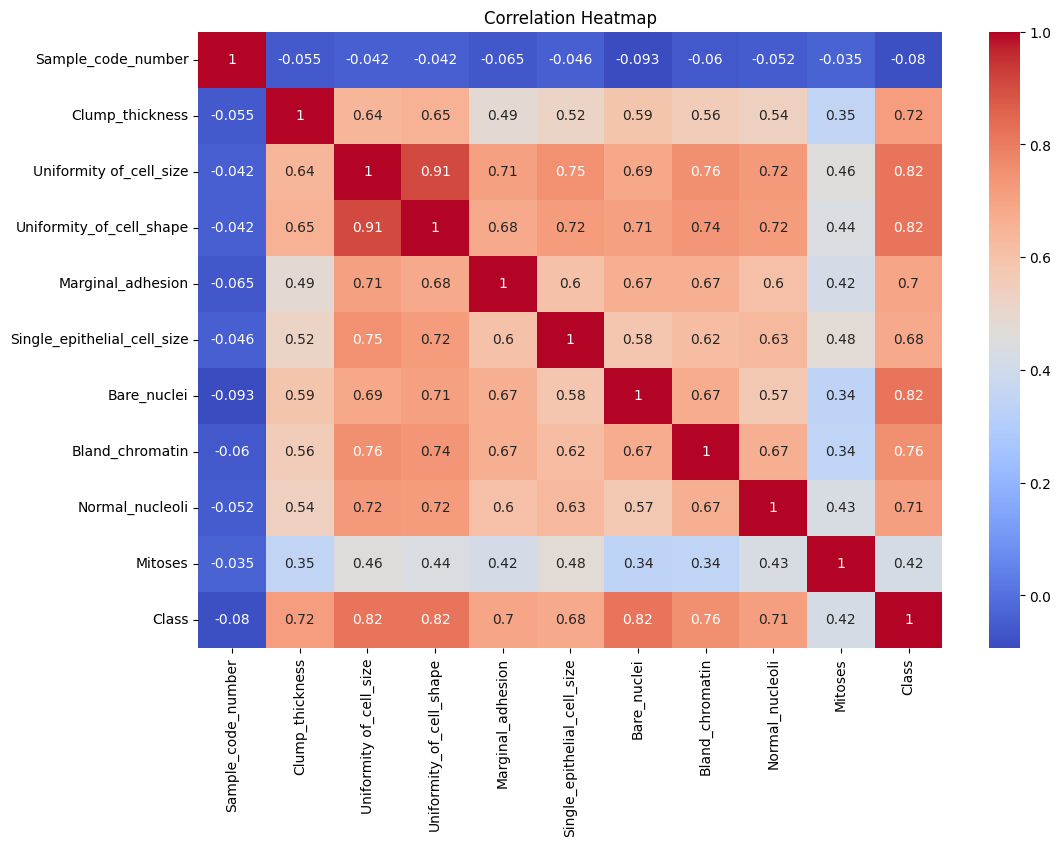

In [ ]:
# Visualizations
plt.figure(figsize=(12, 8))
sns.heatmap(data_imputed.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

pairplot untuk visualisasi distribusi dan hubungan antara fitur-fitur, dengan warna berbeda untuk setiap kelas.

**DATA SPLITTING**

Memisahkan Fitur dan Target: Memisahkan fitur (X) dan target (y) dari dataset.

Pemisahan Data: Menggunakan fungsi 'train_test_split' untuk membagi dataset menjadi set pelatihan (training set) dan set pengujian (testing set) dengan rasio 80:20 dimana test_size=0.2 berarti 20% dari total dataset akan digunakan sebagai set pengujian.

In [ ]:
# Split data into training and testing sets
X = data_imputed.drop(['Class', 'Sample_code_number'], axis=1)
y = data_imputed['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**FEATURE SCALLING**

Standarisasi Data: Menggunakan StandardScaler untuk menstandarisasi fitur agar memiliki mean = 0 dan variance = 1.

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**MODEL TRAINING AND EVALUATION**

pertama kita Menginisialisasi model Logistic Regression dan Random Forest.

lalu kita melakukan pelatihan kedua model menggunakan set pelatihan yang sudah distandarisasi.

setelah itu kita prediksi pada set pengujian menggunakan kedua model.

kita evaluasi performa model dengan menghitung accuracy, precision, recall, dan f1 score menggunakan fungsi evaluate_model. Hasil evaluasi disimpan dalam dictionary metrics.

Membuat DataFrame dari dictionary metrics untuk membandingkan performa kedua model.

terakhir Menentukan model terbaik berdasarkan nilai F1 score tertinggi.

In [ ]:
# Initialize models
logistic_regression = LogisticRegression(random_state=42)
random_forest = RandomForestClassifier(random_state=42)

# Train models
logistic_regression.fit(X_train_scaled, y_train)
random_forest.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = logistic_regression.predict(X_test_scaled)
y_pred_rf = random_forest.predict(X_test_scaled)

# Evaluate models
metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

def evaluate_model(name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, pos_label=4)
    recall = recall_score(y_true, y_pred, pos_label=4)
    f1 = f1_score(y_true, y_pred, pos_label=4)

    metrics['Model'].append(name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1 Score'].append(f1)

# Evaluate Logistic Regression
evaluate_model('Logistic Regression', y_test, y_pred_lr)

# Evaluate Random Forest
evaluate_model('Random Forest', y_test, y_pred_rf)

# Create DataFrame to compare metrics
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

# Determine the best model
best_model = metrics_df.loc[metrics_df['F1 Score'].idxmax()]
print("\nBest Model:\n", best_model)


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.964286   0.976190  0.911111  0.942529
1        Random Forest  0.964286   0.954545  0.933333  0.943820

Best Model:
 Model        Random Forest
Accuracy          0.964286
Precision         0.954545
Recall            0.933333
F1 Score           0.94382
Name: 1, dtype: object


**CONFUSION MATRIX**

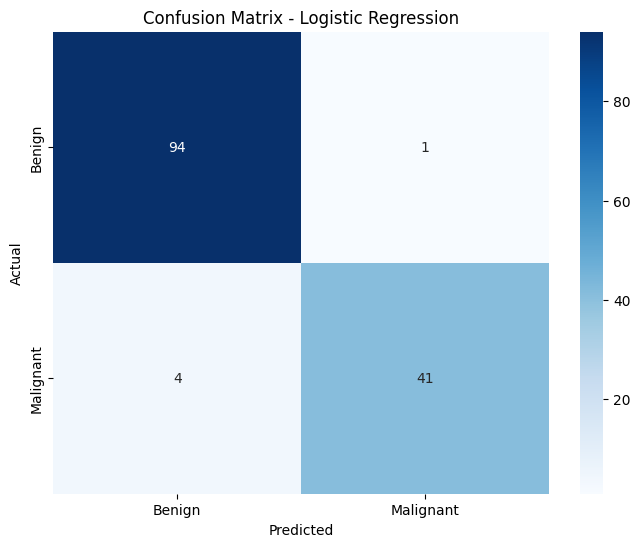

In [ ]:
# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

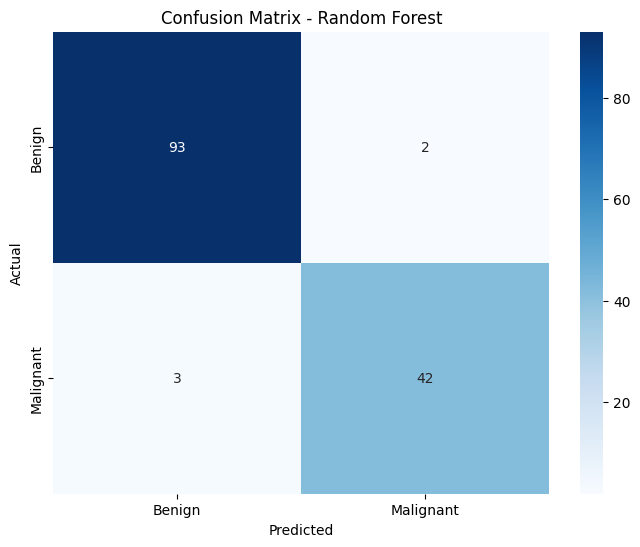

In [ ]:
# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()